C:\Users\migue\AppData\Local\Temp\ipykernel_23184\3512020917.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  total_revenue, error = integrate.quad(revenue_function, 1, len(daily_sales))
C:\Users\migue\AppData\Local\Temp\ipykernel_23184\3512020917.py:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from

Estimated total revenue over the period: $17805.00


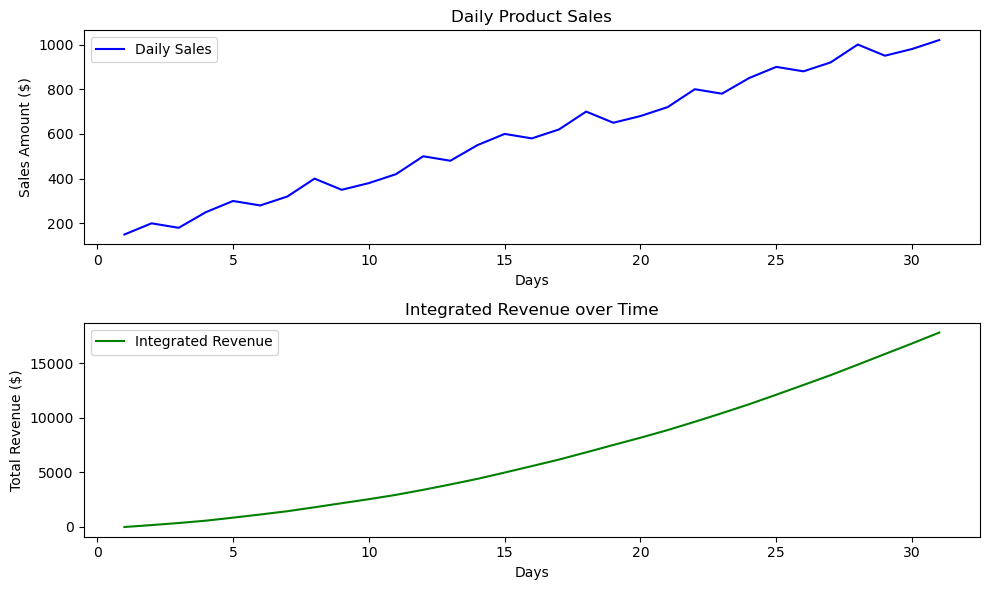

In [14]:
#Code Examples

#Example 1: Defining total revenue from daily sales

from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Simulated daily product sales amounts over a period (in dollars)
daily_sales = np.array([150, 200, 180, 250, 300, 280, 320, 400, 350, 380,
                        420, 500, 480, 550, 600, 580, 620, 700, 650, 680,
                        720, 800, 780, 850, 900, 880, 920, 1000, 950, 980, 1020])

# Time intervals (days)
days = np.arange(1, len(daily_sales) + 1)

# Define the revenue function (approximating the sales data)
def revenue_function(day):
    return np.interp(day, days, daily_sales)

# Use scipy's quad function to perform numerical integration
total_revenue, error = integrate.quad(revenue_function, 1, len(daily_sales))

# Print the result
print(f"Estimated total revenue over the period: ${total_revenue:.2f}")

# Plot the daily sales and the integrated revenue curve
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(days, daily_sales, label='Daily Sales', color='b')
plt.title('Daily Product Sales')
plt.xlabel('Days')
plt.ylabel('Sales Amount ($)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(days, [integrate.quad(revenue_function, 1, day)[0] for day in days], label='Integrated Revenue', color='g')
plt.title('Integrated Revenue over Time')
plt.xlabel('Days')
plt.ylabel('Total Revenue ($)')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
#Example 2: Optimization with constraints
    #OF = 90*X1 + 84*X2 + 70*X3 + 60*X4

    #Subject to:
    #10*X1 + 8*X2 + 9*X3 + 60*X4 <= 5000
    #2*X1 + 3*X2 + 3*X3  <= 1800
    #X1+X2+X3+X4 = 600
    #X3 >= 150
    #X1, X2, X3, X4 >=0


from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the objective function to maximize overall profitability
def objective(x):
    profit_per_unit = [90, 84, 70, 60]
    return -sum(profit_per_unit[i] * x[i] for i in range(4))

# Define the constraints
def constraint_advertising(x):
    advertising_budget = 5000
    advertising_cost_per_unit = [10, 8, 9, 15]
    return advertising_budget - sum(advertising_cost_per_unit[i] * x[i] for i in range(4))

def constraint_salesforce(x):
    max_salesforce_time = 1800
    salesforce_time_per_unit = [2, 3, 3, 0]  # None is treated as 0
    return max_salesforce_time - sum(salesforce_time_per_unit[i] * x[i] for i in range(4))

def constraint_total_units(x):
    total_units = 600
    return total_units - sum(x)

def constraint_retail_units(x):
    min_retail_units = 150
    return x[2] - min_retail_units  # Retail units must be at least 150

# Initial guess (starting point for optimization)
initial_guess = [0, 0, 0, 0]

# Constraints for optimization
constraints = [
    {'type': 'ineq', 'fun': constraint_advertising},
    {'type': 'ineq', 'fun': constraint_salesforce},
    {'type': 'eq', 'fun': constraint_total_units},
    {'type': 'ineq', 'fun': constraint_retail_units}
]

# Bounds for decision variables (number of units for each channel)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve the optimization problem
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Display the results
print("Optimal allocation of units to each channel:", result.x)
print("Maximized overall profitability: $", -result.fun)

Optimal allocation of units to each channel: [ 25. 425. 150.   0.]
Maximized overall profitability: $ 48450.0000000001


T-statistic: -1.4771
P-value: 0.1569
There is no significant difference in clicks between Group A and Group B.


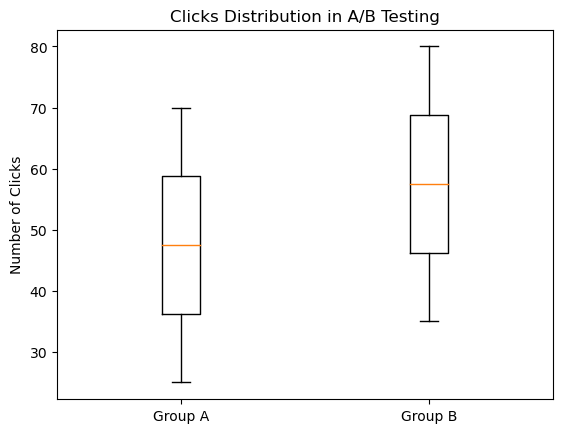

In [1]:
#Example 3

import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Simulated data for A/B testing (number of clicks)
group_a = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
group_b = np.array([35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(group_a, group_b)

# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The difference in clicks between Group A and Group B is statistically significant.")
else:
    print("There is no significant difference in clicks between Group A and Group B.")

# Create a box plot
plt.boxplot([group_a, group_b], labels=['Group A', 'Group B'])
plt.title('Clicks Distribution in A/B Testing')
plt.ylabel('Number of Clicks')
plt.show()
